In [263]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


def load_data(filepath):

    with open(filepath, encoding="UTF8") as csvfile:
        pokemon = csv.DictReader(csvfile)

        output = []
        for data in pokemon:
            output.append(data)

        # pop #,Name,Type 1,Type 2,Total
        popData = ['#', 'Name', 'Type 1', 'Type 2',
                   'Total', 'Generation', 'Legendary']
        for data in output:
            for key in popData:
                data.pop(key)

    return output

# input: dict representing one Pokemon
# output: numpy array of shape (6,) and  dtype int64. The first element is x1 and so
# on with the sixth element being x6.


def calc_features(row):
    output = np.array(np.zeros(6), dtype=np.int64)
    output[0] = int(row['Attack'])
    output[1] = int(row['Sp. Atk'])
    output[2] = int(row['Speed'])
    output[3] = int(row['Defense'])
    output[4] = int(row['Sp. Def'])
    output[5] = int(row['HP'])

    return output

    # Z[i, 0] and Z[i, 1] represent the indices of the two cluster
    # Z[i, 2] represents complete linkage distance between Z[i, 0] and Z[i, 1]
    # Z[i, 3] tells the size of the new cluster


def hac(features):
    featureLength = len(features)

    # Create an (n − 1) × 4 array or list.
    arr = np.zeros(shape=(featureLength - 1, 4))

    # id : size, combined cluster features list
    clusterInfo = {}

    # Z[i, 0] and Z[i, 1] represent the indices of the two cluster
    # Z[i, 2] represents complete linkage distance between Z[i, 0] and Z[i, 1]
    # Z[i, 3] tells the size of the new cluster
    # distance matrix for each point
    dist = np.full([featureLength * 2, featureLength * 2], -1.0)

    # This 2D array will store the distance, also! And no updates
    # This is just for decreasing the time
    distConst = np.zeros(shape=(featureLength, featureLength))

    for i in range(featureLength):
        # set ID to every single point
        clusterInfo.update({i: [1, [i]]})
        for j in range(i + 1, featureLength):
            x = np.array([features[i], features[j]])
            # Use numpy.linalg.norm()
            dist[i][j] = dist[j][i] = distConst[i][j] = distConst[j][i] = np.linalg.norm(
                abs(features[i] - features[j]))

    # Iterate through this array/list row by row.
    index = featureLength  # This index will update the new cluster.

    for row in arr:
        # Determine which two clusters you should merge and put their numbers into the
        # first and second elements of the row, Z[i, 0] and Z[i, 1] and Z[i, 0] < Z[i, 1].
        min = -1
        for i in range(featureLength * 2):
            for j in range(i + 1, featureLength * 2):
                # This ith jth cluster is used
                if dist[i][j] == -99:
                    continue
                if dist[i][j] != -1:
                    # This cluster has a distance
                    if min == -1:
                        min = dist[i][j]
                        feature1 = i
                        feature2 = j
                    elif min > dist[i][j]:
                        min = dist[i][j]
                        feature1 = i
                        feature2 = j

        row[0] = feature1
        row[1] = feature2
        row[2] = min
        row[3] = clusterInfo[feature1][0] + clusterInfo[feature2][0]

        # Update the distance matrix that used.
        for i in range(featureLength * 2):
            dist[feature1][i] = -99
            dist[feature2][i] = -99
        for i in dist:
            i[feature1] = -99
            i[feature2] = -99

        # set ID to the new cluster
        infos = []
        for i in clusterInfo[feature1][1]:
            infos.append(i)
        for i in clusterInfo[feature2][1]:
            infos.append(i)

        # Delete the cluster which is used
        clusterInfo.pop(feature1)
        clusterInfo.pop(feature2)

        clusterInfo.update({index: [row[3], infos]})

        # Update the distance between the new cluster and the existing cluster
        for i in range(0, featureLength * 2):
            if i in clusterInfo.keys():
                # Access every nodes in the cluster
                for firstItem in clusterInfo[i][1]:
                    for secondItem in clusterInfo[index][1]:
                        v = distConst[firstItem][secondItem]
                        # Set the maximum value of the distance between two clusters
                        if i != index and v > dist[i][index]:
                            dist[i][index] = dist[index][i] = v

        # Update the cluster ID
        index += 1

    return arr


def imshow_hac(Z):
    dn = dendrogram(Z)
    plt.show()


In [264]:
# load_data check
pokemon_list = load_data("Pokemon.csv")
# display(pokemon_list)

In [265]:
# calc_features check
np_pokemon_list = []
np_pokemon_list.append(calc_features(pokemon_list[0]))
np_pokemon_list.append(calc_features(pokemon_list[1]))
np_pokemon_list.append(calc_features(pokemon_list[2]))
np_pokemon_list.append(calc_features(pokemon_list[3]))
np_pokemon_list.append(calc_features(pokemon_list[4]))
np_pokemon_list.append(calc_features(pokemon_list[5]))
# display(np_pokemon_list)


In [266]:
# hac check
hac(np_pokemon_list)

array([[  1.        ,   5.        ,  25.65151068,   2.        ],
       [  0.        ,   4.        ,  27.03701167,   2.        ],
       [  6.        ,   7.        ,  47.60252094,   4.        ],
       [  2.        ,   3.        ,  52.9905652 ,   2.        ],
       [  8.        ,   9.        , 139.11865439,   6.        ]])

In [267]:
# Final check
hac([calc_features(row) for row in load_data('Pokemon.csv')][:30])

array([[ 13.        ,  16.        ,  10.        ,   2.        ],
       [ 14.        ,  17.        ,  10.        ,   2.        ],
       [ 24.        ,  26.        ,  14.03566885,   2.        ],
       [  3.        ,  12.        ,  14.73091986,   2.        ],
       [ 25.        ,  27.        ,  20.42057786,   2.        ],
       [  0.        ,   9.        ,  22.09072203,   2.        ],
       [  1.        ,  10.        ,  22.8035085 ,   2.        ],
       [  2.        ,  11.        ,  23.34523506,   2.        ],
       [  4.        ,  28.        ,  24.43358345,   2.        ],
       [ 20.        ,  32.        ,  24.53568829,   3.        ],
       [ 29.        ,  34.        ,  28.39013913,   3.        ],
       [  5.        ,  15.        ,  29.22327839,   2.        ],
       [  6.        ,  23.        ,  34.45286635,   2.        ],
       [ 21.        ,  38.        ,  35.73513677,   3.        ],
       [ 30.        ,  31.        ,  37.41657387,   4.        ],
       [ 22.        ,  40

In [268]:
linkage([calc_features(row) for row in load_data('Pokemon.csv')][:30], method='complete')

array([[ 13.        ,  16.        ,  10.        ,   2.        ],
       [ 14.        ,  17.        ,  10.        ,   2.        ],
       [ 24.        ,  26.        ,  14.03566885,   2.        ],
       [  3.        ,  12.        ,  14.73091986,   2.        ],
       [ 25.        ,  27.        ,  20.42057786,   2.        ],
       [  0.        ,   9.        ,  22.09072203,   2.        ],
       [  1.        ,  10.        ,  22.8035085 ,   2.        ],
       [  2.        ,  11.        ,  23.34523506,   2.        ],
       [  4.        ,  28.        ,  24.43358345,   2.        ],
       [ 20.        ,  32.        ,  24.53568829,   3.        ],
       [ 29.        ,  34.        ,  28.39013913,   3.        ],
       [  5.        ,  15.        ,  29.22327839,   2.        ],
       [  6.        ,  23.        ,  34.45286635,   2.        ],
       [ 21.        ,  38.        ,  35.73513677,   3.        ],
       [ 30.        ,  31.        ,  37.41657387,   4.        ],
       [ 22.        ,  40

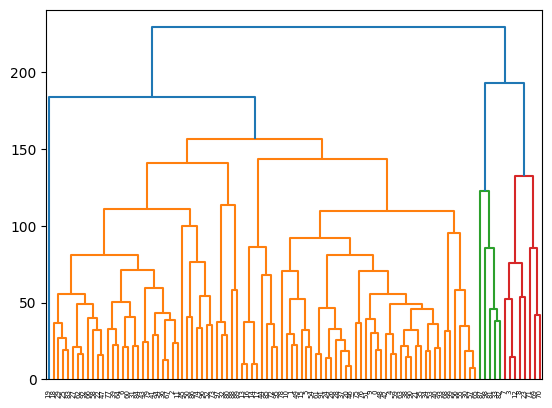

In [269]:
# Check plot
imshow_hac(linkage([calc_features(row) for row in load_data('Pokemon.csv')][:100], method='complete'))

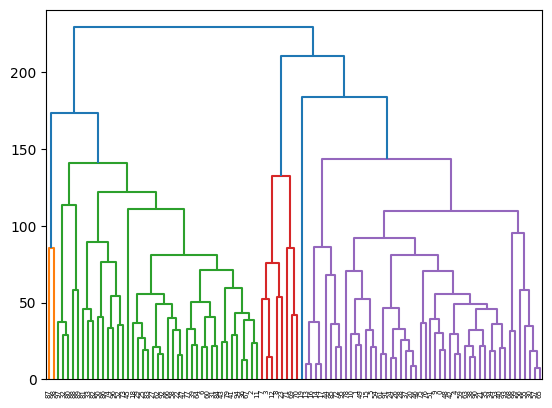

In [270]:

# Check plot
imshow_hac(hac([calc_features(row) for row in load_data('Pokemon.csv')][:100]))